### Tiling

In [ ]:
from util import *
import h5py
from speech2vec.tiling import *

In [1]:
path = "/home/antonie/Project/speech2vec/result/dsp_hw2_one_digit_seq2seq/fbank_delta/"
weight_file = "batch_64_epoch_500_hidden_50_depth_2,2_dropout_0.15_reversebatch_64_epoch_500_hidden_50_depth_2,2_dropout_0.15_reverse_epoch_500.h5"
weight_file = path + weight_file

In [2]:

h5f = h5py.File(weight_file,'r')
code = h5f['code'][:]
rec_X = h5f['rec_X'][:]

In [4]:
_, X,y = load_digits()

In [13]:
ann = build_annoy_tree(X)

In [15]:
tiled_X = tile_reconstruction(rec_X, ann)

In [19]:
csv_dir = "/home/antonie/Project/speech2vec/result/dsp_hw2_one_digit_seq2seq/fbank_delta/csv/tiled_batch_64_epoch_500_hidden_50_depth_2,2_dropout_0.15/"
save_to_csv(tiled_X, csv_dir)

708it [00:05, 126.67it/s]


# TSNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

### Original Speech Distribution

In [10]:
drawX = X.reshape(708, 60 * 225)

tsne_original_X = tsne.fit_transform(drawX)

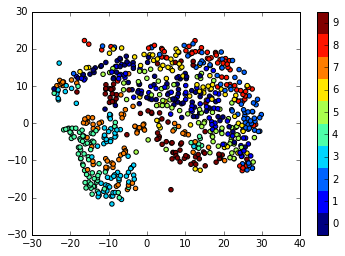

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(tsne_original_X[:,0], tsne_original_X[:,1], c=y, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

### Encoded distribution

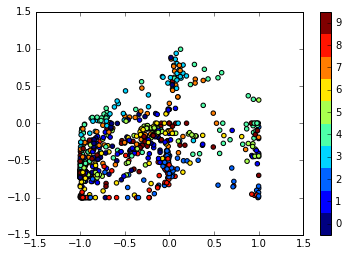

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(code[:,0], code[:,1], c=y, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()